In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("Infy_stock.csv")
print(data.shape)
data.head()

(523, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,7.390,7.410,7.315,7.370,6.167809,7727200
1,2017-01-04,7.425,7.610,7.425,7.565,6.331000,12092200
2,2017-01-05,7.525,7.555,7.475,7.510,6.284972,11927400
3,2017-01-06,7.355,7.430,7.230,7.410,6.201283,27104200
4,2017-01-09,7.355,7.520,7.340,7.480,6.259865,19123800


In [3]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
data.dropna(subset=["Close"], axis=0, inplace=True)
data["Date"] = pd.to_datetime(data['Date'])
data.set_index(['Date'], inplace=True)
print(data.shape)
data.head()

(523, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,7.390,7.410,7.315,7.370,6.167809,7727200
2017-01-04,7.425,7.610,7.425,7.565,6.331000,12092200
2017-01-05,7.525,7.555,7.475,7.510,6.284972,11927400
2017-01-06,7.355,7.430,7.230,7.410,6.201283,27104200
2017-01-09,7.355,7.520,7.340,7.480,6.259865,19123800


In [5]:
split_date = pd.Timestamp('01-01-2019')

train = data.loc[:split_date]
test = data.loc[split_date:]

In [6]:
train = train[["Close"]]
test = test[['Close']]

train.tail()

,Close
Date,
2018-12-24,9.08
2018-12-26,9.38
2018-12-27,9.45
2018-12-28,9.43
2018-12-31,9.52


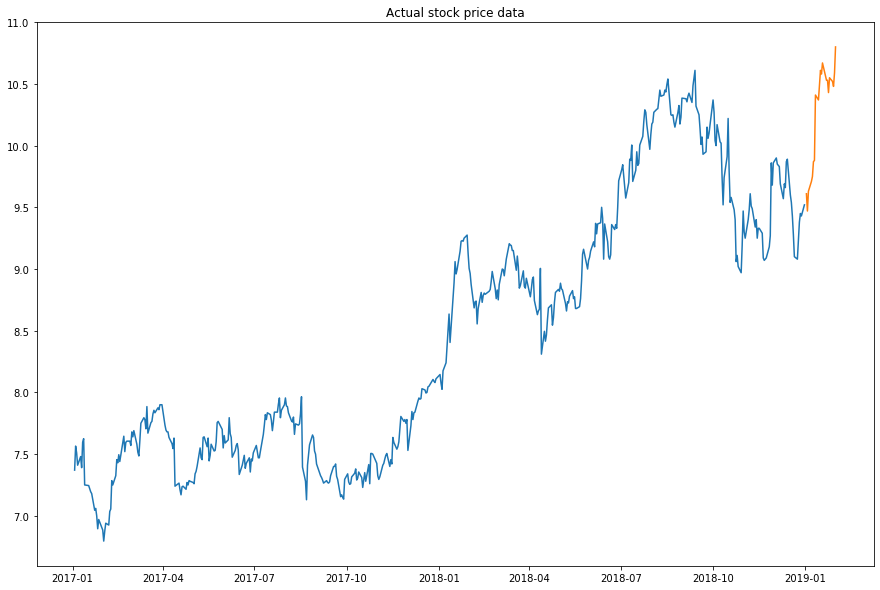

In [7]:
plt.figure(figsize=(15, 10))
plt.plot(train)
plt.plot(test)
plt.title("Actual stock price data")
plt.show()

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. 

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)
print("Train Sc data is: \n", train_sc[:5])

Train Sc data is: 
 [[0.15072084]
 [0.20183486]
 [0.18741809]
 [0.16120577]
 [0.17955439]]


In [9]:
train_sc_df = pd.DataFrame(train_sc, columns=["Y"], index=train.index)

for i in range(1, 4):
    train_sc_df["X_{}".format(i)] = train_sc_df['Y'].shift(i)
    
X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().iloc[:, 0]

print("\nX_train is: \n", X_train.head())
print("\nY_train is: \n", y_train.head())

X_train = X_train.values
X_train = np.expand_dims(X_train, axis=2)
y_train = y_train.values


X_train is: 
                  X_1       X_2       X_3
Date                                    
2017-01-06  0.187418  0.201835  0.150721
2017-01-09  0.161206  0.187418  0.201835
2017-01-10  0.179554  0.161206  0.187418
2017-01-11  0.155963  0.179554  0.161206
2017-01-12  0.209699  0.155963  0.179554

Y_train is: 
 Date
2017-01-06    0.161206
2017-01-09    0.179554
2017-01-10    0.155963
2017-01-11    0.209699
2017-01-12    0.217562
Name: Y, dtype: float64


In [10]:
print(X_train.shape)
X_train[:5]

(499, 3, 1)


array([[[0.18741809],
        [0.20183486],
        [0.15072084]],

       [[0.16120577],
        [0.18741809],
        [0.20183486]],

       [[0.17955439],
        [0.16120577],
        [0.18741809]],

       [[0.1559633 ],
        [0.17955439],
        [0.16120577]],

       [[0.20969856],
        [0.1559633 ],
        [0.17955439]]])

In [11]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


Using TensorFlow backend.


In [12]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
499/499 [==============================] - 3s 5ms/step - loss: 0.2049 - accuracy: 0.0020
Epoch 2/100
499/499 [==============================] - 0s 313us/step - loss: 0.0640 - accuracy: 0.0040
Epoch 3/100
499/499 [==============================] - 0s 300us/step - loss: 0.0327 - accuracy: 0.0040
Epoch 4/100
499/499 [==============================] - 0s 305us/step - loss: 0.0117 - accuracy: 0.0040
Epoch 5/100
499/499 [==============================] - 0s 294us/step - loss: 0.0069 - accuracy: 0.0040
Epoch 6/100
499/499 [==============================] - 0s 321us/step - loss: 0.0053 - accuracy: 0.0040
Epoch 7/100
499/499 [==============================] - 0s 329us/step - loss: 0.0049 - accuracy: 0.0040
Epoch 8/100
499/499 [==============================] - 0s 313us/step - loss: 0.0056 - accuracy: 0.0040
Epoch 9/100
499/499 [==============================] - 0s 305us/step - loss: 0.0053 - accuracy: 0.0040
Epoch 10/100
499/499 [==============================] - 0s 305us/step - los

499/499 [==============================] - 0s 300us/step - loss: 0.0026 - accuracy: 0.0040
Epoch 80/100
499/499 [==============================] - 0s 305us/step - loss: 0.0026 - accuracy: 0.0040
Epoch 81/100
499/499 [==============================] - 0s 281us/step - loss: 0.0024 - accuracy: 0.0040
Epoch 82/100
499/499 [==============================] - 0s 291us/step - loss: 0.0026 - accuracy: 0.0040
Epoch 83/100
499/499 [==============================] - 0s 281us/step - loss: 0.0026 - accuracy: 0.0040
Epoch 84/100
499/499 [==============================] - 0s 305us/step - loss: 0.0028 - accuracy: 0.0040
Epoch 85/100
499/499 [==============================] - 0s 289us/step - loss: 0.0028 - accuracy: 0.0040
Epoch 86/100
499/499 [==============================] - 0s 305us/step - loss: 0.0027 - accuracy: 0.0040
Epoch 87/100
499/499 [==============================] - 0s 292us/step - loss: 0.0026 - accuracy: 0.0040
Epoch 88/100
499/499 [==============================] - 0s 281us/step - loss:

In [13]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3, 50)             10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 3, 50)             20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 3, 50)             20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 3, 50)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

In [14]:
regressor.history.history.keys()

dict_keys(['loss', 'accuracy'])

In [15]:
regressor.evaluate(X_train, y_train)

499/499 [==============================] - 0s 538us/step


[0.0012587468682943221, 0.004008016083389521]

<function matplotlib.pyplot.show(*args, **kw)>

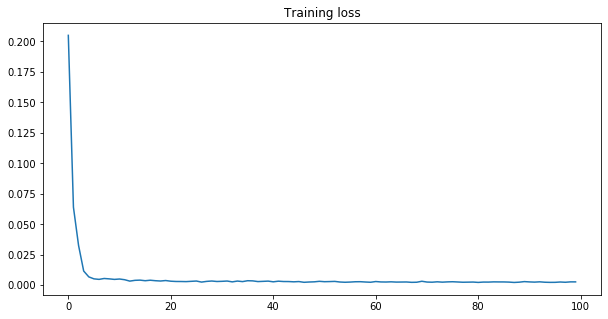

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(regressor.history.history['loss'])
plt.title("Training loss")
plt.show

In [17]:
y_pred = regressor.predict(X_train)
y_pred_val = pd.DataFrame(y_pred, columns=["Close"], index=train.index[3:])
y_pred_val = sc.inverse_transform(y_pred_val)
y_pred_val = pd.DataFrame(y_pred_val, columns=["Close"], index=train.index[3:])

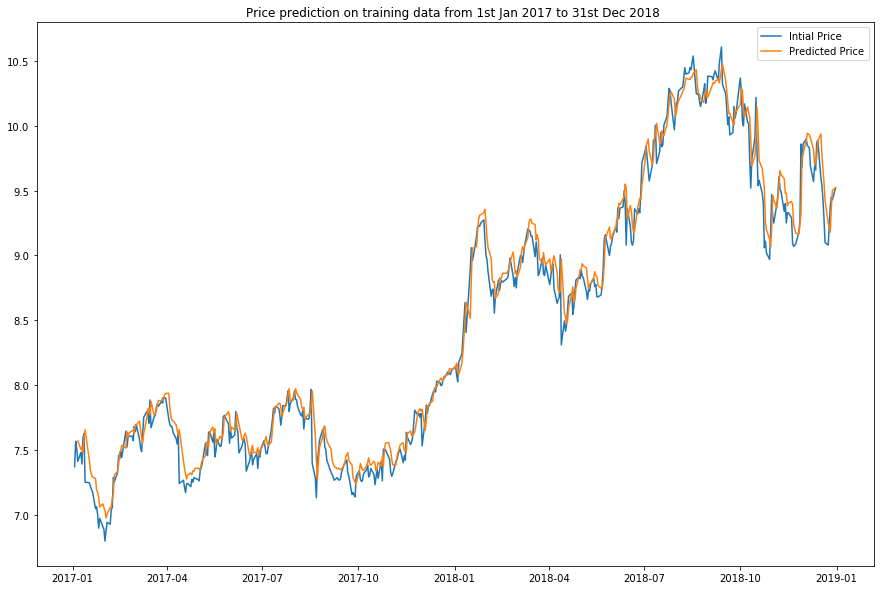

In [18]:
plt.figure(figsize=(15, 10))
plt.plot(train)
plt.plot(y_pred_val)
plt.title("Price prediction on training data from 1st Jan 2017 to 31st Dec 2018 ")
plt.legend(["Intial Price", "Predicted Price"])
plt.show()

In [19]:
nextDayPrice = y_pred[-1]
y_forcast = [nextDayPrice.item(0)]
X_inp = X_train[-1]
X_inp = np.expand_dims(X_inp, axis=0)
for i in range(len(test) -1):
    X_inp[0, 0, 0], X_inp[0, 1, 0],  X_inp[0, 2, 0] = X_inp[0, 1, 0],  X_inp[0, 2, 0], nextDayPrice.item(0)
    nextDayPrice = regressor.predict(X_inp)
    y_forcast.append(nextDayPrice.item(0))
    

In [20]:
# idx = pd.date_range('01-01-2019', '31-01-2019')
# test = test.reindex(idx, fill_value=np.NaN)
# test = test.ffill()
# test = test.bfill()

In [21]:
y_forcast = pd.DataFrame(y_forcast, columns=["Close"], index=test.index)
y_forcast = sc.inverse_transform(y_forcast)
y_forcast = pd.DataFrame(y_forcast, columns=["Close"], index=test.index)

## a) Plot the actual closing stock to the predicted price

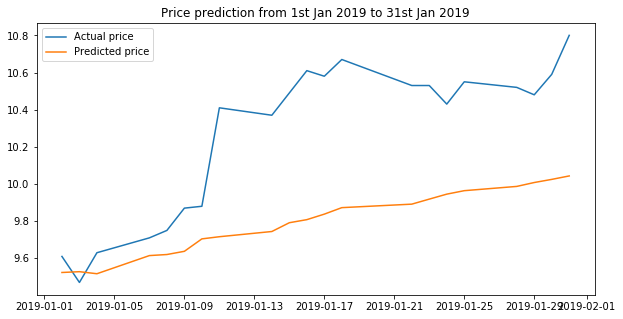

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(test)
plt.plot(y_forcast)
plt.legend(["Actual price", "Predicted price"])
plt.title("Price prediction from 1st Jan 2019 to 31st Jan 2019")
plt.show()

In [23]:
actual_price = train[3:].append(test)
predicted_price = y_pred_val.append(y_forcast)

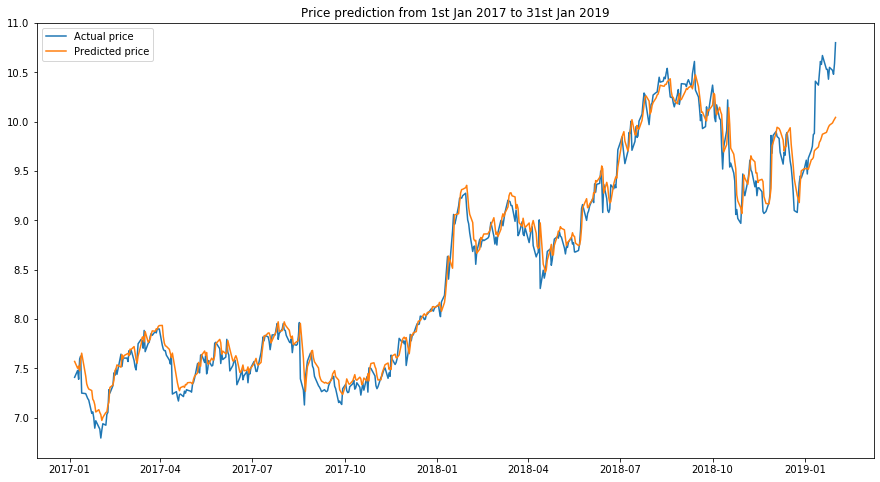

In [24]:
plt.figure(figsize=(15, 8))
plt.plot(actual_price)
plt.plot(predicted_price)
plt.legend(["Actual price", "Predicted price"])
plt.title("Price prediction from 1st Jan 2017 to 31st Jan 2019")
plt.show()

## b) Comment on the prediction

Prediction obtained by 1 day lag was very bad, so I increased the lag to 3 days. Prediction obtained on the training dataset is very close to the actual value. So the model is performing very good on the training data. Prediction obtained on the test set is not so good. Model is not able to predict the correct price of the stock for the next day. The poor prediction on the test data may be because we are not considering the actual price of stock on the previous days. Model is predicting good on training data because we are using the actual price of the previous days for training dataset.

## c) How to improve prediction

Prediction can be improved by
* If we use actual price value of previous day to predict the price for the next day then prediction on the test will be much more closer to actual value
* For the current prediction, I have taken previous 3 days' price to predict the next day price. If we take much more lag then prediction can be improved
* If we use more dense layer in the model, then prediction can be improved
* Ensemble learning(Add different models)
* Find the K nearest neighbour company of INFOSYS stocks. FInd corelation to find the nearest company